In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('data/train_cleaned.csv')
test_df = pd.read_csv('data/test_cleaned.csv')

In [4]:
train_df.shape,test_df.shape

((54808, 13), (23490, 12))

In [5]:
# lets split the target data from the train data

y = train_df['is_promoted']
x = train_df.drop(['is_promoted'], axis = 1)
x_test = test_df

# lets print the shapes of these newly formed data sets
print("Shape of the x :", x.shape)
print("Shape of the y :", y.shape)
print("Shape of the x Test :", x_test.shape)

Shape of the x : (54808, 12)
Shape of the y : (54808,)
Shape of the x Test : (23490, 12)


In [6]:
# It is very important to resample the data, as the Target class is Highly imbalanced.
# Here We are going to use Over Sampling Technique to resample the data.
# lets import the SMOTE algorithm to do the same.

from imblearn.over_sampling import SMOTE

x_resample, y_resample  = SMOTE().fit_resample(x, y.values.ravel())

# lets print the shape of x and y after resampling it
print(x_resample.shape)
print(y_resample.shape)


(100280, 12)
(100280,)


In [7]:
# lets also check the value counts of our target variable

print("Before Resampling :")
print(y.value_counts())

print("After Resampling :")
y_resample = pd.DataFrame(y_resample)
print(y_resample[0].value_counts())

Before Resampling :
0    50140
1     4668
Name: is_promoted, dtype: int64
After Resampling :
1    50140
0    50140
Name: 0, dtype: int64


In [8]:
# lets create a validation set from the training data so that we can check whether the model that we have created is good enough
# lets import the train_test_split library from sklearn to do that

from sklearn.model_selection import train_test_split

x_train, x_test1, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 41)

# lets print the shapes again 
print("Shape of the x Train :", x_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x test1 :", x_test1.shape)
print("Shape of the y test1 :", y_test.shape)
print("Shape of the x Test :", x_test.shape)

Shape of the x Train : (43846, 12)
Shape of the y Train : (43846,)
Shape of the x test1 : (10962, 12)
Shape of the y test1 : (10962,)
Shape of the x Test : (23490, 12)


In [9]:
# It is very import to scale all the features of the dataset into the same scale
# Here, we are going to use the standardization method, which is very commonly used.

# lets import the standard scaler library from sklearn to do that
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test1 = sc.transform(x_test1)
x_test = sc.transform(x_test)

## Decision Tree

In [10]:
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

Training Accuracy : 0.9934087488026274
Testing Accuracy : 0.8950921364714468


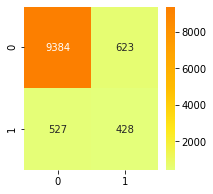

In [11]:
# Lets use Decision Trees to classify the data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

model = DecisionTreeClassifier()
model.fit(x_train,y_train)


y_pred = model.predict(x_test1)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test1, y_test))

cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

In [12]:
decision_tree = model.predict(x_test)
decision_tree

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [13]:
prediction = model.predict(np.array([[6, #department code
                                      2, #masters degree
                                      1, #male
                                      10, #1 training
                                      35, #30 years old
                                      5, #previous year rating
                                      10, #length of service
                                      8, #KPIs met >80%
                                      10, #awards won
                                      90, #avg training score
                                      30, #sum of metric 
                                      100 #total score
                                     ]]))


In [14]:
if prediction == 1:
    print("employee promoted")
else:
    print("woops! employee not promoted")

employee promoted
